<a href="https://colab.research.google.com/github/Ankit-Pankaj/thesisProject/blob/main/ThesisCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image




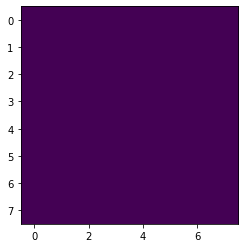

In [4]:
x=[[0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0],]

plt.imshow(x , interpolation='none')

In [5]:
new_array = [0,0,0,0,
             0,0,0,0,
             0,0,0,0,
             0,255,0,0,
             255,0,0,255,
             0,0,0,0,
             0,0,255,0,
             0,0,0,0]

# plt.imshow(new_array , interpolation='none')

In [6]:

def matrixGenerator(matrix):
  np.random.shuffle(matrix)
  matrix = np.reshape(new_array, (8, 4))
  new_matrix = matrix;
  new_matrix = np.resize(new_matrix, (8,8))
  for i in range(0,8):
    for j in range(0,4):
      new_matrix[i][j] = matrix[i][j]

  for i in range(0,8):
    for j in range(0,4):
      new_matrix[i][7-j] = matrix[i][j]
  plt.imshow(new_matrix , interpolation='none')
  return new_matrix

In [7]:
def classify(a):
  for i in range(0,4):
    for j in range(0,4):
      if a[i][j]==255:
        return True
  return False        
      

In [8]:
def saveImage(a, index):
  a = a.astype(np.uint8)
  data = Image.fromarray(a)
  if classify(a):
    data.save('bad'+index+'.jpg')
  else:
    data.save('good'+index+'.jpg')  
  


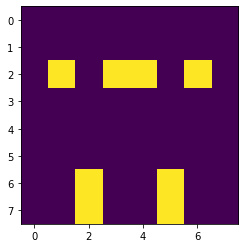

In [9]:
for i in range(0,1000):
  pic = matrixGenerator(new_array)
  saveImage(pic, str(i))



In [28]:
def mirror(a):
  new_matrix = a;
  new_matrix = np.resize(new_matrix, (8,8))
  for i in range(0,8):
    for j in range(0,4):
      new_matrix[i][j] = a[i][j]

  for i in range(0,8):
    for j in range(0,4):
      new_matrix[i][7-j] = a[i][j]
  return new_matrix

In [36]:
def permute():
  count=0;
  for i in range(0,29):
    for j in range(i+1,30):
      for k in range(j+1,31):
        for l in range(k+1,32):
          a= np.zeros(32)
          a[i]=255
          a[j]=255
          a[k]=255
          a[l]=255
          res=np.reshape(a,(8,4))
          fullMatrix = mirror(res)
          plt.imshow(fullMatrix)
          saveImage(fullMatrix, str(count))
          count=count+1
          # print(res)

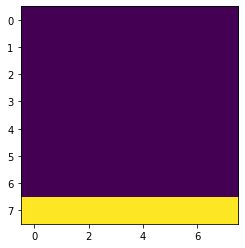

In [37]:
permute()

In [2]:
cd ../content/

/content


In [3]:
!unzip "./Dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/train/Bad/bad6974.jpg  
  inflating: Dataset/train/Bad/bad6975.jpg  
  inflating: Dataset/train/Bad/bad6976.jpg  
  inflating: Dataset/train/Bad/bad6977.jpg  
  inflating: Dataset/train/Bad/bad6978.jpg  
  inflating: Dataset/train/Bad/bad6979.jpg  
  inflating: Dataset/train/Bad/bad698.jpg  
  inflating: Dataset/train/Bad/bad6980.jpg  
  inflating: Dataset/train/Bad/bad6981.jpg  
  inflating: Dataset/train/Bad/bad6982.jpg  
  inflating: Dataset/train/Bad/bad6983.jpg  
  inflating: Dataset/train/Bad/bad6984.jpg  
  inflating: Dataset/train/Bad/bad6985.jpg  
  inflating: Dataset/train/Bad/bad6986.jpg  
  inflating: Dataset/train/Bad/bad6987.jpg  
  inflating: Dataset/train/Bad/bad6988.jpg  
  inflating: Dataset/train/Bad/bad6989.jpg  
  inflating: Dataset/train/Bad/bad699.jpg  
  inflating: Dataset/train/Bad/bad6990.jpg  
  inflating: Dataset/train/Bad/bad6991.jpg  
  inflating: Dataset/train/Bad/bad6992.jpg  
  infl

In [4]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np


In [5]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [10]:
TRAINING_DIR = "./Dataset/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./Dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 32364 images belonging to 2 classes.
Found 3596 images belonging to 2 classes.


In [11]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [12]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/10
   1/3237 [..............................] - ETA: 3:36 - loss: 2.2707 - acc: 0.8000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


3237/3237 [==============================] - 173s 53ms/step - loss: 0.1199 - acc: 0.9594 - val_loss: 0.1232 - val_acc: 0.9853
INFO:tensorflow:Assets written to: model2-001.model/assets
Epoch 2/10
3237/3237 [==============================] - 174s 54ms/step - loss: 0.0867 - acc: 0.9638 - val_loss: 0.0535 - val_acc: 0.9986
INFO:tensorflow:Assets written to: model2-002.model/assets
Epoch 3/10
3237/3237 [==============================] - 172s 53ms/step - loss: 0.0765 - acc: 0.9689 - val_loss: 0.2432 - val_acc: 0.9196
Epoch 4/10
3237/3237 [==============================] - 174s 54ms/step - loss: 0.0778 - acc: 0.9685 - val_loss: 0.4397 - val_acc: 0.7798
Epoch 5/10
3237/3237 [==============================] - 175s 54ms/step - loss: 0.0724 - acc: 0.9712 - val_loss: 0.4133 - val_acc: 0.7956
Epoch 6/10
3237/3237 [==============================] - 175s 54ms/step - loss: 0.0714 - acc: 0.9713 - val_loss: 0.1244 - val_acc: 0.9822
Epoch 7/10
3237/3237 [==============================] - 173s 54ms/step 

In [13]:
model=load_model("./model2-002.model")


In [34]:
good = cv2.imread("./Dataset/test/Good/good35778.jpg")

In [27]:
bad = cv2.imread("./Dataset/test/Bad/bad30448.jpg")

In [21]:
from google.colab.patches import cv2_imshow


In [26]:
cv2_imshow(good)

In [28]:
cv2_imshow(bad)

In [35]:
 good=cv2.flip(good,1,1)
 rerect_sized=cv2.resize(good,(150,150))
 normalized=rerect_sized/255.0
 reshaped=np.reshape(normalized,(1,150,150,3))
 reshaped = np.vstack([reshaped])
 result_good=model.predict(reshaped)


In [30]:
 bad=cv2.flip(bad,1,1)
 rerect_sized=cv2.resize(bad,(150,150))
 normalized=rerect_sized/255.0
 reshaped=np.reshape(normalized,(1,150,150,3))
 reshaped = np.vstack([reshaped])
 result_bad=model.predict(reshaped)


In [36]:
result_good


array([[0.14573723, 0.8542627 ]], dtype=float32)

In [33]:
result_bad

array([[0.9961779 , 0.00382203]], dtype=float32)